In [1]:
#inspect_stock_data.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#23 January 2018
#
#this reads some NYSE data and makes some charts

In [2]:
#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import datetime
import numpy as np
import pandas as pd
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
pd.set_option('display.max_columns', None)

In [3]:
#check file parsing
file = 'data/NYSE_20150626.txt'
df = pd.read_csv(file, parse_dates=['<date>'])
df.columns = [col.replace('<', '').replace('>', '') for col in df.columns]
!head -6 data/NYSE_20150626.txt
print df.dtypes
df.head(5)

<ticker>,<date>,<open>,<high>,<low>,<close>,<vol>
A,20150626,40,40.17,39.78,40.02,3350400
AA,20150626,34.74,35.28,34.68,35.07,16253200
AAC,20150626,43.43,43.48,42.33,43.17,304400
AAN,20150626,36.73,36.84,36.43,36.53,658600
AAP,20150626,164.98,165.16,163.48,164.28,858600
ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
vol                int64
dtype: object


,ticker,date,open,high,low,close,vol
0,A,2015-06-26,40.00,40.17,39.78,40.02,3350400
1,AA,2015-06-26,34.74,35.28,34.68,35.07,16253200
2,AAC,2015-06-26,43.43,43.48,42.33,43.17,304400
3,AAN,2015-06-26,36.73,36.84,36.43,36.53,658600
4,AAP,2015-06-26,164.98,165.16,163.48,164.28,858600


In [4]:
#read NYSE data
import glob
files = glob.glob('data/*.txt')
dataframes = []
for file in files:
    df = pd.read_csv(file, parse_dates=['<date>'])
    dataframes.append(df)
data = pd.concat(dataframes, ignore_index=True)
data.columns = [col.replace('<', '').replace('>', '') for col in data.columns]
data = data.sort_values(['date', 'ticker'])
print data.dtypes
print 'number of records (M) = ', len(data)/1.0e6
data.head()

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
vol                int64
dtype: object
number of records (M) =  3.445273


,ticker,date,open,high,low,close,vol
118299,A,2013-01-01,29.2847,29.2847,29.2847,29.2847,0
118300,AA,2013-01-01,26.0400,26.0400,26.0400,26.0400,0
118301,AAN,2013-01-01,28.2800,28.2800,28.2800,28.2800,0
118302,AAP,2013-01-01,72.3500,72.3500,72.3500,72.3500,0
118303,AAT,2013-01-01,27.9300,27.9300,27.9300,27.9300,0


In [5]:
#compute volume of shares traded each day
N_shares_traded = data.groupby('date')['vol'].sum()

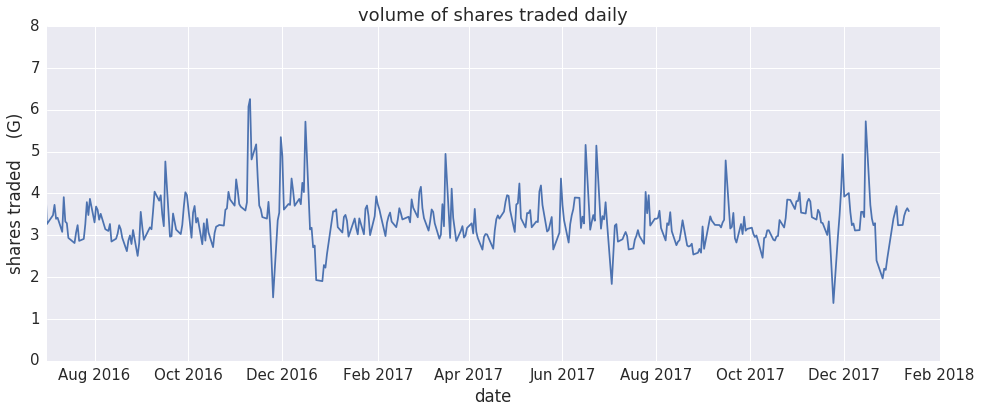

In [6]:
#plot daily volume vs date
fig, ax = plt.subplots(figsize=(16, 6))
idx = (N_shares_traded > 0)
xp = N_shares_traded[idx].index
yp = N_shares_traded[idx].values/1.0e9
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('volume of shares traded daily')
ax.set_xlabel('date')
ax.set_ylabel('shares traded    (G)')
ax.set_ylim(0, 8)
ax.set_xlim('2016-07-01', '2018-02-01')
plt.savefig('figs/volume.png')

In [7]:
#compute volume-weighted share price versus date
def volume_weighted_share_price(record):
    vwsp = None
    cv = record['close']*record['vol']
    v_total = record['vol'].sum()
    if (v_total > 0.0):
        #vwsp = np.sqrt((cv**2).sum())/v_total
        vwsp = cv.sum()/v_total
    return vwsp
vwsp = data.groupby('date').apply(volume_weighted_share_price)

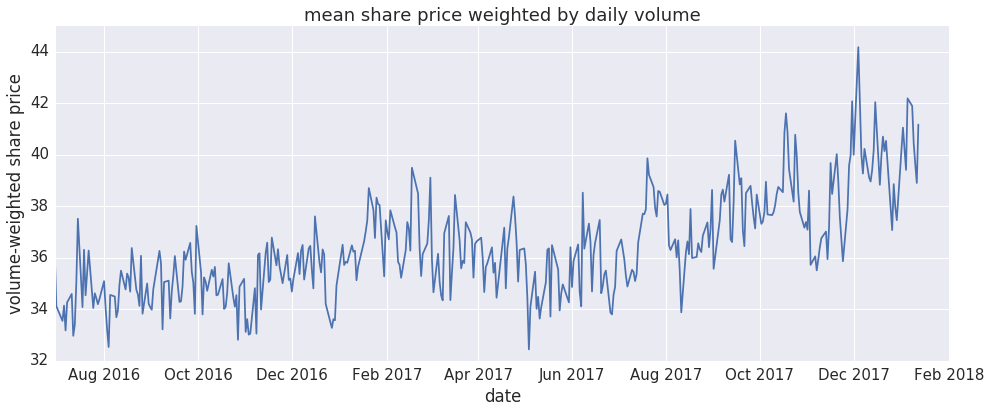

In [8]:
#plot volume-weighted share price vs date
fig, ax = plt.subplots(figsize=(16, 6))
idx = (vwsp > 0)
xp = vwsp[idx].index
yp = vwsp[idx].values
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('mean share price weighted by daily volume')
ax.set_xlabel('date')
ax.set_ylabel('volume-weighted share price')
ax.set_ylim(32, 45)
ax.set_xlim('2016-07-01', '2018-02-01')
plt.savefig('figs/vwsp.png')